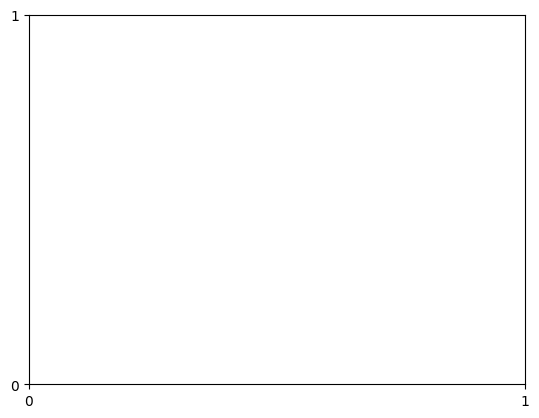

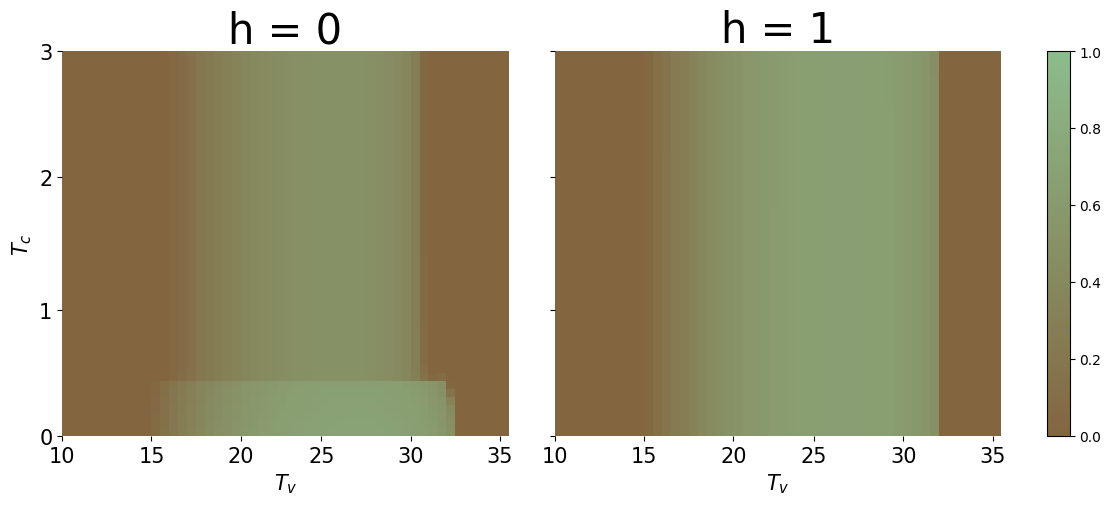

Here


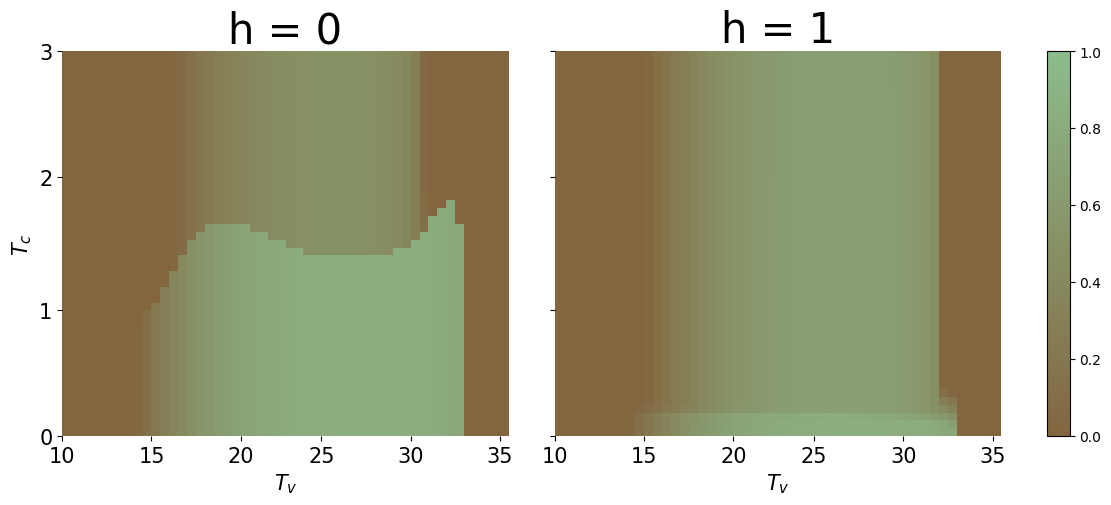

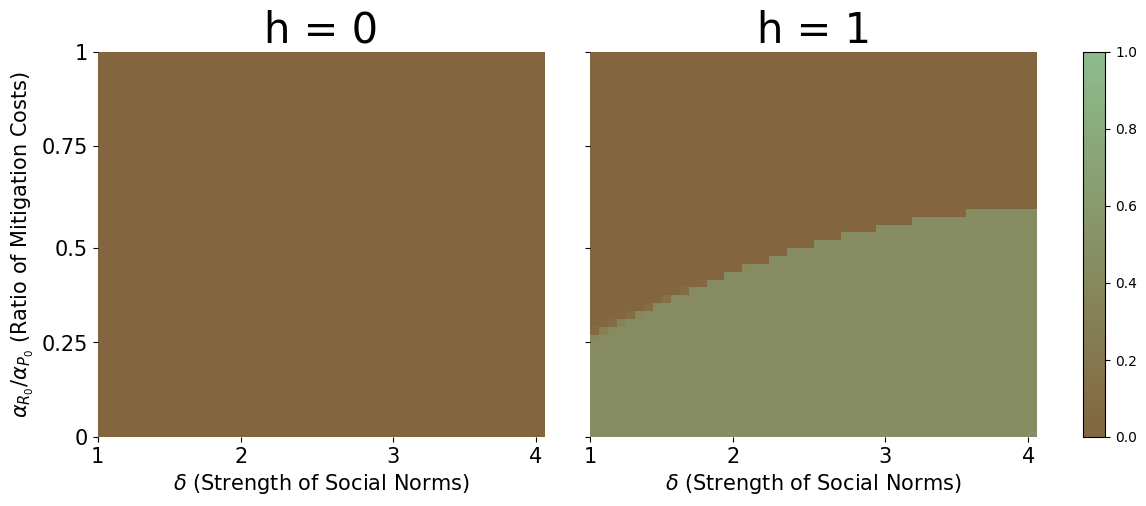

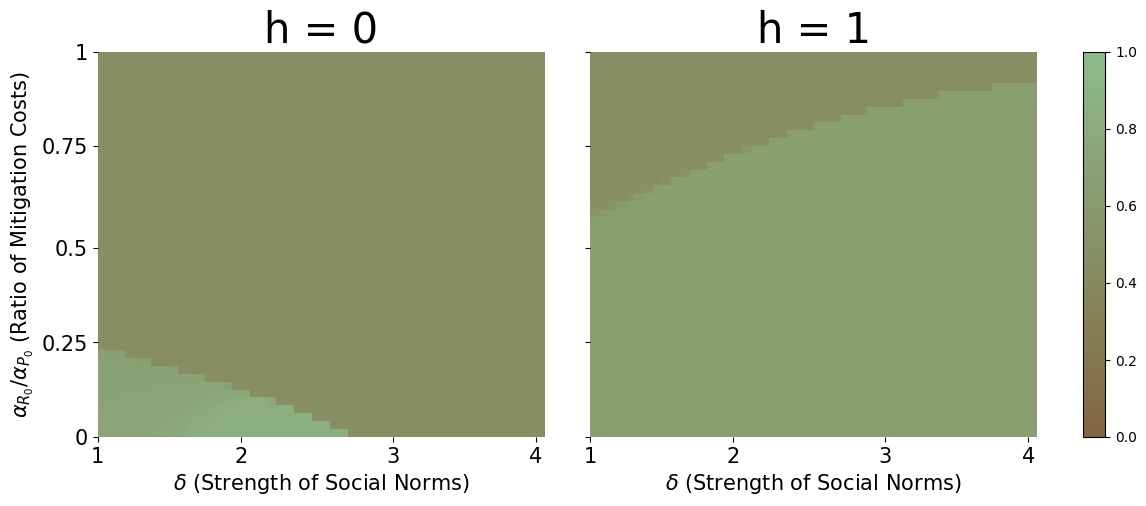

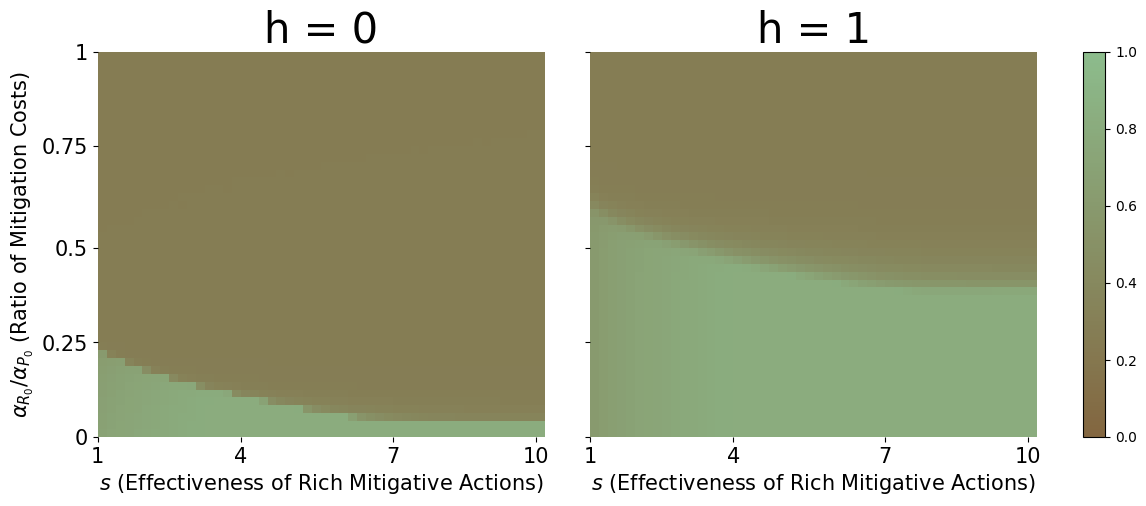

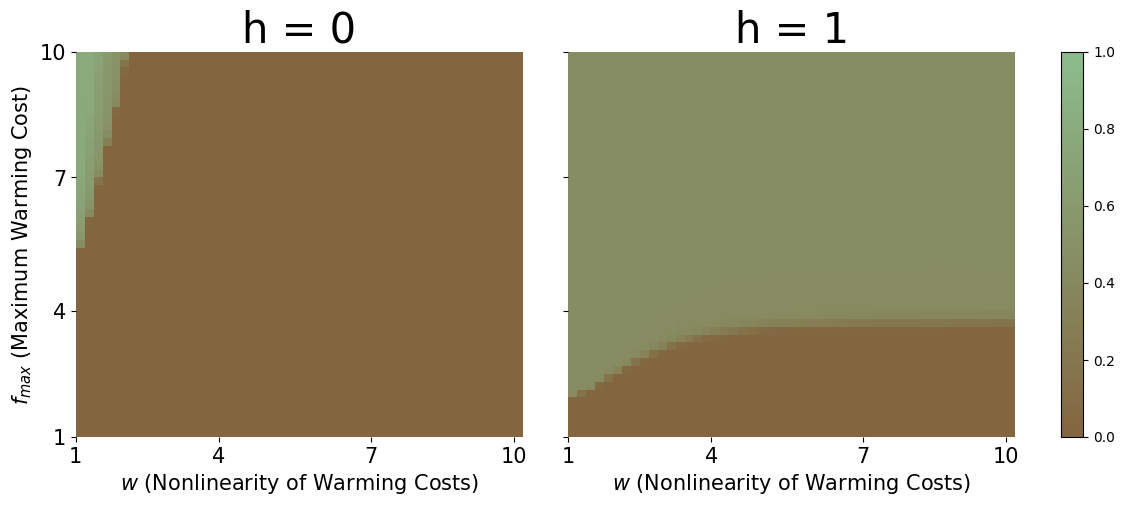

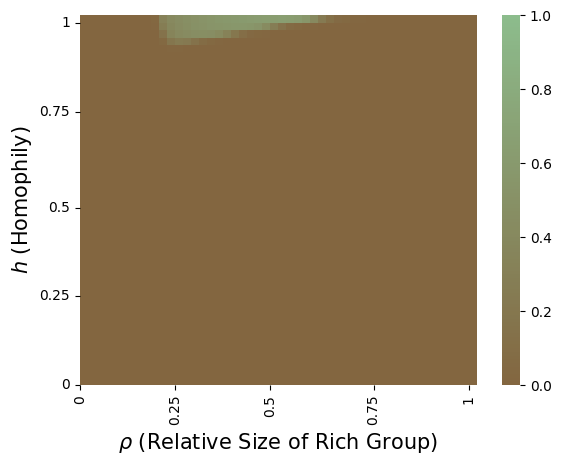

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
from scipy.integrate import odeint
import matplotlib.gridspec as gridspec
import seaborn as sns
from dde_figs import model, history_function
from heterogeneous_pop import heterogeneous_pop_model, doub_history_function
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

colors = [(0.5125, 0.4,   0.25), (0.55,   0.7375, 0.55)]  # Brown to light green
n_bins = 100  # Number of bins for the gradient

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list("brown_to_lightgreen", colors, N=n_bins)

max_ticks = 6

delay = 10
steps = 50
proportion_vals = np.linspace(0,1,steps)

tc_ticks = [0, 1, 2, 3]
tv_ticks = [10,15,20,25,30,35]
delta_ticks = [1,2,3,4]
proportion_ticks=[0,0.25,0.5,0.75,1]
fmaxw_ticks=[1,4,7,10]
s_ticks=[1,4,7,10]

Tv_values = np.linspace(10, 35, steps)
Tc_values = np.linspace(0, 3, steps)
v0, x0 = 0.1, 0.9
tspan = np.linspace(delay, 200, 10000)
proportion_vals = np.linspace(0,1,steps)
delta_vals = np.linspace(1,4,steps)
fmax_vals = np.linspace(1,10,steps)
w_vals = np.linspace(1,10,steps)

def h_classify(v_final, xp_final, xr_final, avg_v, avg_xp, avg_xr, rho):
    x_avg = rho * avg_xr + (1-rho) * avg_xp
    x_fin = rho * xr_final+ (1-rho) * xp_final
    if avg_v > 0.1 and avg_v <0.9 and x_avg > 0.1 and x_avg < 0.9:
        return 2 + (v_final + x_fin)/1.8
    else:
        return v_final + x_fin
    
def veg_classify(v_final):
    return v_final

# def heterogeneous_param_sweep(Tv, Tc, v0=0.5, h=0.5):
#     xr_vals = np.linspace(0,1,steps)
#     xp_vals = np.linspace(0,1,steps)
#     outcome_grid = np.empty((len(xr_vals), len(xp_vals)))
#     for i, xr in enumerate(xr_vals):
#         for j, xp in enumerate(xp_vals):
#             hist = doub_history_function(v0, Tv, xr, xp)
#             sol = ddeint(heterogeneous_pop_model, hist, tspan, fargs=(delay, Tv, Tc, 5, 0.5, 1, 0.05, 1, xr, xp, 5, 3.5, 0.25, 0.4, 0.85, 1.1, 1.35, h, 5, 3, 3, 1.5, 1))
#             #v_raw = [sol_val[0] for sol_val in sol]
#             v_raw = sol[:,0]
#             xp_raw = sol[:,1]
#             xr_raw = sol[:,2]
#             #xp_raw = [sol_val[1] for sol_val in sol]
#             #xr_raw = [sol_val[2] for sol_val in sol]
#             #avg_v = sum(v_raw) / len(v_raw)
#             #avg_xp = sum(xp_raw) / len(xp_raw)
#             #avg_xr = sum(xr_raw) / len(xr_raw)
#             v_final_val, xp_final_val, xr_final_val = sol[-1]
#             del sol, v_raw, xp_raw, xr_raw
#             #outcome_grid[i,j] = h_classify(v_final_val, xp_final_val, xr_final_val, avg_v, avg_xp, avg_xr, 0.2)
#             outcome_grid[i,j] = veg_classify(v_final_val)
#     return outcome_grid


def heterogeneous_heat_sweep(Tc_vals, Tv_vals, v0, xr0, xp0, h, fmax, d):
    outcome_grid = np.empty((len(Tc_vals), len(Tv_vals)))
    for i, Tc in enumerate(Tc_vals):
        for j, Tv in enumerate(Tv_vals):
            hist = doub_history_function(v0, Tv, xr0, xp0)
            sol = ddeint(heterogeneous_pop_model, hist, tspan, fargs=(delay, Tv, Tc, fmax, 0.5, 1, 0.05, 1, xr0, xp0, 5, 3.5, 0.25, 0.4, 0.85, 1.1, 1.35, h, d, 3, 3, 1.5, 1))
            #v_raw = [sol_val[0] for sol_val in sol]
            #xp_raw = [sol_val[1] for sol_val in sol]
            #xr_raw = [sol_val[2] for sol_val in sol]
            v_raw = sol[:,0]
            xp_raw =sol[:,1]
            xr_raw = sol[:,2]
            #avg_v = sum(v_raw) / len(v_raw)
            #avg_xp = sum(xp_raw) / len(xp_raw)
            #avg_xr = sum(xr_raw) / len(xr_raw)
            v_final_val, xp_final_val, xr_final_val = sol[-1]
            del sol, v_raw, xp_raw, xr_raw
            #outcome_grid[i,j] = h_classify(v_final_val, xp_final_val, xr_final_val, avg_v, avg_xp, avg_xr, 0.2)
            outcome_grid[i,j] = veg_classify(v_final_val)
    return outcome_grid

%matplotlib inline
# ax=sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 0, 3, 12), vmin=0, vmax=1, cmap=cmap, cbar=False)
# x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
# y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(tv_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(tc_ticks)
# #plt.title("V0=0.1, Xr0 = 0.9, Xp0 = 0.9")
# plt.gca().invert_yaxis()
# plt.xlabel(r'$T_v$', fontsize=15)
# plt.ylabel(r'$T_c$', fontsize=15)
# plt.title('h=0', fontsize=20)
# #plt.show()
# plt.savefig("fmaxdbadh0.png")
# plt.show()

# ax=sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 1, 3, 12), vmax=1, cmap=cmap)
# x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
# y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(tv_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(tc_ticks)
# #plt.title("V0=0.1, Xr0 = 0.9, Xp0 = 0.9")
# plt.gca().invert_yaxis()
# plt.xlabel(r'$T_v$', fontsize=15)
# plt.ylabel(r'$T_c$', fontsize=15)
# plt.title('h=1', fontsize=20)
# #plt.show()
# plt.savefig("fmaxdbadh1.png")
# plt.show()

fig = plt.figure(figsize=(13, 5))
gs=gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[1,1,0.05], wspace=0.15)

ax0=fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])
data0 = heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 0, 3, 12)
data1 = heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 1, 3, 12)
hm0 = sns.heatmap(data=data0, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0,xticklabels=False, yticklabels=False)
hm1 = sns.heatmap(data=data1, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax1, xticklabels=False, yticklabels=False)

#ax0 = axes[0]
#sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 0, 3, 12), vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0, xticklabels=False, yticklabels=False)
x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
ax0.set_ylim(35,10)
ax0.set_xticks(x_tick_positions)
ax0.set_xticklabels(tv_ticks)
ax0.set_yticks(y_tick_positions)
ax0.set_yticklabels(tc_ticks)
ax0.set_xticklabels(tv_ticks, fontsize=15, rotation=0)
ax0.set_yticklabels(tc_ticks, fontsize=15, rotation=0)
ax0.tick_params(axis='y', left=True, labelleft=True)
ax0.invert_yaxis()
ax0.set_xlabel(r'$T_v$', fontsize=15)
ax0.set_ylabel(r'$T_c$', fontsize=15)
ax0.set_title('h = 0', fontsize=30)

#ax1=axes[1]
#sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 1, 3, 12), vmax=1, cmap=cmap, ax=ax1, xticklabels=False, yticklabels=False)
#x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
#y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
ax1.set_ylim(35,10)
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(tv_ticks)
ax1.set_yticks(y_tick_positions)
ax1.set_xticklabels(tv_ticks, fontsize=15, rotation=0)
#ax1.set_yticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=True)
ax1.invert_yaxis()
ax1.set_xlabel(r'$T_v$', fontsize=15)
ax1.set_title('h = 1', fontsize=30)

#plt.setp(ax0.get_yticklabels(), visible=True)
#ax0.tick_params(axis='y', labelleft=True)

#plt.tight_layout()

fig.colorbar(hm1.collections[0], cax=cax)
#cax.set_ylabel("Probability", fontsize=14)
cax.tick_params(labelsize=10)

plt.savefig("fmaxbad_combined.png", dpi=300, bbox_inches="tight")
plt.show()
print("Here")

fig = plt.figure(figsize=(13, 5))
gs=gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[1,1,0.05], wspace=0.15)

ax0=fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])
data0=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 0, 6, 1)
data1=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 1, 6, 1)
hm0 = sns.heatmap(data=data0, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0,xticklabels=False, yticklabels=False)
hm1 = sns.heatmap(data=data1, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax1, xticklabels=False, yticklabels=False)

#ax0=axes[0]
#sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 0, 6, 1), vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0, xticklabels=False, yticklabels=False)
x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
ax0.set_ylim(35,10)
ax0.set_xticks(x_tick_positions)
ax0.set_xticklabels(tv_ticks)
ax0.set_yticks(y_tick_positions)
ax0.set_yticklabels(tc_ticks)
ax0.set_xticklabels(tv_ticks, fontsize=15, rotation=0)
ax0.set_yticklabels(tc_ticks, fontsize=15, rotation=0)
ax0.tick_params(axis='y', left=True, labelleft=True)
ax0.invert_yaxis()
ax0.set_xlabel(r'$T_v$', fontsize=15)
ax0.set_ylabel(r'$T_c$', fontsize=15)
ax0.set_title('h = 0', fontsize=30)

#ax1=axes[1]
#sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 1, 6, 1), vmin=0, vmax=1, cmap=cmap, ax=ax1, xticklabels=False, yticklabels=False)
#x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
#y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
ax1.set_ylim(35,10)
ax1.invert_yaxis()
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(tv_ticks)
ax1.set_yticks(y_tick_positions)
#ax1.set_yticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=True)
ax1.set_xticklabels(tv_ticks, fontsize=15, rotation=0)
ax1.set_xlabel(r'$T_v$', fontsize=15)
ax1.set_title('h = 1', fontsize=30)

#plt.setp(ax0.get_yticklabels(), visible=True)
#ax0.tick_params(axis='y', labelleft=True)

#plt.tight_layout()

fig.colorbar(hm1.collections[0], cax=cax)
#cax.set_ylabel("Probability", fontsize=14)
cax.tick_params(labelsize=10)

plt.savefig("fmaxgood_combined.png", dpi=300, bbox_inches="tight")
plt.show()


# ax=sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 0, 6, 1), vmin=0, vmax=1, cmap=cmap, cbar=False)
# x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
# y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(tv_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(tc_ticks)
# #plt.title("V0=0.1, Xr0 = 0.9, Xp0 = 0.9")
# plt.gca().invert_yaxis()
# plt.xlabel(r'$T_v$', fontsize=15)
# plt.ylabel(r'$T_c$', fontsize=15)
# plt.title('h=0', fontsize=20)
# #plt.show()
# plt.savefig("fmaxdgoodh0.png")
# plt.show()

# ax=sns.heatmap(data=heterogeneous_heat_sweep(Tc_values, Tv_values, 0.1, 0.1, 0.8, 1, 6, 1), vmin=0, vmax=1, cmap=cmap)
# x_tick_positions = [np.abs(Tv_values - tick).argmin() for tick in tv_ticks]
# y_tick_positions = [np.abs(Tc_values - tick).argmin() for tick in tc_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(tv_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(tc_ticks)
# #plt.title("V0=0.1, Xr0 = 0.9, Xp0 = 0.9")
# plt.gca().invert_yaxis()
# plt.xlabel(r'$T_v$', fontsize=15)
# plt.ylabel(r'$T_c$', fontsize=15)
# plt.title('h=1', fontsize=20)
# #plt.show()
# plt.savefig("fmaxdgoodh1.png")
# plt.show()

ratio_vals = np.linspace(0,1,steps)
def social_sweep_ratios(ratio_vals, delta_vals, Tv, Tc, v0, xr0, xp0, h):
    outcome_grid = np.empty((len(ratio_vals), len(delta_vals)))
    for i, ratio in enumerate(ratio_vals):
        for j, delta in enumerate(delta_vals):
            hist = doub_history_function(v0, Tv, xr0, xp0)
            sol = ddeint(heterogeneous_pop_model, hist, tspan, fargs=(delay, Tv, Tc, 5, 3*ratio, delta, 0.05, 3, xr0, xp0, 5, 3.5, 0.25, 0.4, 0.85, 1.1, 1.35, h, 5, 3, 3, 1.5, 1))
            # v_raw = [sol_val[0] for sol_val in sol]
            # xp_raw = [sol_val[1] for sol_val in sol]
            # xr_raw = [sol_val[2] for sol_val in sol]
            v_raw = sol[:,0]
            xp_raw =sol[:,1]
            xr_raw = sol[:,2]
            #avg_v = sum(v_raw) / len(v_raw)
            #avg_xp = sum(xp_raw) / len(xp_raw)
            #avg_xr = sum(xr_raw) / len(xr_raw)
            v_final_val, xp_final_val, xr_final_val = sol[-1]
            del sol, v_raw, xp_raw, xr_raw
            #outcome_grid[i,j] = h_classify(v_final_val, xp_final_val, xr_final_val, avg_v, avg_xp, avg_xr, 0.2)
            outcome_grid[i,j] = veg_classify(v_final_val)
    return outcome_grid

fig= plt.figure(figsize=(13, 5))
gs=gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[1,1,0.05], wspace=0.15)

ax0=fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])
data0= social_sweep_ratios(ratio_vals, delta_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 0)
data1= social_sweep_ratios(ratio_vals, delta_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 1)
hm0 = sns.heatmap(data=data0, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0,xticklabels=False, yticklabels=False)
hm1 = sns.heatmap(data=data1, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax1, xticklabels=False, yticklabels=False)

#ax0=axes[0]
#sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0, xticklabels=False, yticklabels=False)
y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
ax0.set_ylim(1,0)
ax0.set_xticks(x_tick_positions)
ax0.set_xticklabels(delta_ticks)
ax0.set_yticks(y_tick_positions)
ax0.set_yticklabels(proportion_ticks)
ax0.set_xticklabels(delta_ticks, fontsize=15, rotation=0)
ax0.set_yticklabels(proportion_ticks, fontsize=15, rotation=0)
ax0.tick_params(axis='y', left=True, labelleft=True)
ax0.invert_yaxis()
ax0.set_xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
ax0.set_ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
ax0.set_title('h = 0', fontsize=30)

#ax1=axes[1]
#sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap, ax=ax1, xticklabels=False, yticklabels=False)
#y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
#x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
ax1.set_ylim(1,0)
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(delta_ticks)
ax1.set_yticks(y_tick_positions)
ax1.set_xticklabels(delta_ticks, fontsize=15, rotation=0)
#ax1.set_yticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=True)
ax1.invert_yaxis()
ax1.set_xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
ax1.set_title('h = 1', fontsize=30)

#plt.setp(ax0.get_yticklabels(), visible=True)
#ax0.tick_params(axis='y', labelleft=True)

#plt.tight_layout()

fig.colorbar(hm1.collections[0], cax=cax)
#cax.set_ylabel("Probability", fontsize=14)
cax.tick_params(labelsize=10)

plt.savefig("alpharatiohighcombined.png", dpi=300, bbox_inches="tight")
plt.show()


# ax=sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False)
# y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
# x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(delta_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(proportion_ticks)
# plt.gca().invert_yaxis()
# plt.ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
# plt.xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
# plt.title('h=0', fontsize=20)
# #plt.show()
# plt.savefig("alpharatioh0.png")
# plt.show()


# ax=sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap)
# y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
# x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(delta_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(proportion_ticks)
# plt.gca().invert_yaxis()
# plt.ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
# plt.xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
# plt.title('h=1', fontsize=20)
# #plt.show()
# plt.savefig("alpharatioh1.png")
# plt.show()

fig = plt.figure(figsize=(13, 5))
gs=gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[1,1,0.05], wspace=0.15)

ax0=fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])
data0= social_sweep_ratios(ratio_vals, delta_vals, 28, 0.5, 0.1, 0.5, 0.5, 0)
data1= social_sweep_ratios(ratio_vals, delta_vals, 28, 0.5, 0.1, 0.5, 0.5, 1)
hm0 = sns.heatmap(data=data0, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0,xticklabels=False, yticklabels=False)
hm1 = sns.heatmap(data=data1, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax1, xticklabels=False, yticklabels=False)

#ax0=axes[0]
#sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 28, 0.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0, xticklabels=False, yticklabels=False)
y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
ax0.set_ylim(1,0)
ax0.set_xticks(x_tick_positions)
ax0.set_xticklabels(delta_ticks)
ax0.set_yticks(y_tick_positions)
ax0.set_yticklabels(proportion_ticks)
ax0.set_xticklabels(delta_ticks, fontsize=15, rotation=0)
ax0.set_yticklabels(proportion_ticks, fontsize=15, rotation=0)
ax0.tick_params(axis='y', left=True, labelleft=True)
ax0.invert_yaxis()
ax0.set_xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
ax0.set_ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
ax0.set_title('h = 0', fontsize=30)

#ax1=axes[1]
#sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 28, 0.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap, ax=ax1, xticklabels=False, yticklabels=False)
#y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
#x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
ax1.set_ylim(1,0)
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(delta_ticks)
ax1.set_yticks(y_tick_positions)
#ax1.set_yticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=True)
ax1.set_xticklabels(delta_ticks, fontsize=15, rotation=0)
ax1.invert_yaxis()
ax1.set_xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
ax1.set_title('h = 1', fontsize=30)

#plt.setp(ax0.get_yticklabels(), visible=True)
#ax0.tick_params(axis='y', labelleft=True)

#plt.tight_layout()
fig.colorbar(hm1.collections[0], cax=cax)
#cax.set_ylabel("Probability", fontsize=14)
cax.tick_params(labelsize=10)

plt.savefig("alpharatiolowcombined.png", dpi=300, bbox_inches="tight")
plt.show()

# ax=sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 28, 0.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False)
# y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
# x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(delta_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(proportion_ticks)
# plt.gca().invert_yaxis()
# plt.ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
# plt.xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
# plt.title('h=0', fontsize=20)
# #plt.show()
# plt.savefig("alpharatioh0_low.png")
# plt.show()

# ax=sns.heatmap(data=social_sweep_ratios(ratio_vals, delta_vals, 28, 0.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap)
# y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
# x_tick_positions = [np.abs(delta_vals - tick).argmin() for tick in delta_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(delta_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(proportion_ticks)
# plt.gca().invert_yaxis()
# plt.ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
# plt.xlabel(r'$\delta$ (Strength of Social Norms)', fontsize=15)
# plt.title('h=1', fontsize=20)
# #plt.show()
# plt.savefig("alpharatioh1_low.png")
# plt.show()

s_vals = np.linspace(1,10,steps)

def effectiveness_sweep(ratio_vals, s_vals, Tv, Tc, v0, xr0, xp0, h):
    outcome_grid = np.empty((len(ratio_vals), len(s_vals)))
    for i, ratio in enumerate(ratio_vals):
        for j, s in enumerate(s_vals):
            hist = doub_history_function(v0, Tv, xr0, xp0)
            sol = ddeint(heterogeneous_pop_model, hist, tspan, fargs=(delay, Tv, Tc, 5, 3*ratio, 1, 0.05, 3, xr0, xp0, 5, 3.5, 0.25, 0.4, 0.85, 1.1, 1.35, h, 5, 3, 3, 1.5, s))
            # v_raw = [sol_val[0] for sol_val in sol]
            # xp_raw = [sol_val[1] for sol_val in sol]
            # xr_raw = [sol_val[2] for sol_val in sol]
            v_raw = sol[:,0]
            xp_raw =sol[:,1]
            xr_raw = sol[:,2]
            # avg_v = sum(v_raw) / len(v_raw)
            # avg_xp = sum(xp_raw) / len(xp_raw)
            # avg_xr = sum(xr_raw) / len(xr_raw)
            v_final_val, xp_final_val, xr_final_val = sol[-1]
            del sol, v_raw, xp_raw, xr_raw
            #outcome_grid[i,j] = h_classify(v_final_val, xp_final_val, xr_final_val, avg_v, avg_xp, avg_xr, 0.2)
            outcome_grid[i,j] = veg_classify(v_final_val)
    return outcome_grid

fig = plt.figure(figsize=(13, 5))
gs=gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[1,1,0.05], wspace=0.15)

ax0=fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])
data0= effectiveness_sweep(ratio_vals, s_vals, 30, 0.5, 0.1, 0.5, 0.5, 0)
data1= effectiveness_sweep(ratio_vals, s_vals, 30, 0.5, 0.1, 0.5, 0.5, 1)
hm0 = sns.heatmap(data=data0, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0,xticklabels=False, yticklabels=False)
hm1 = sns.heatmap(data=data1, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax1, xticklabels=False, yticklabels=False)

#ax0=axes[0]
#sns.heatmap(data=effectiveness_sweep(ratio_vals, s_vals, 30, 0.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0, xticklabels=False, yticklabels=False)
y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
x_tick_positions = [np.abs(s_vals - tick).argmin() for tick in s_ticks]
ax0.set_ylim(1,0)
ax0.set_xticks(x_tick_positions)
ax0.set_xticklabels(s_ticks)
ax0.set_yticks(y_tick_positions)
ax0.set_yticklabels(proportion_ticks)
ax0.set_xticklabels(s_ticks, fontsize=15, rotation=0)
ax0.set_yticklabels(proportion_ticks, fontsize=15, rotation=0)
ax0.tick_params(axis='y', left=True, labelleft=True)
ax0.invert_yaxis()
ax0.set_xlabel(r'$s$ (Effectiveness of Rich Mitigative Actions)', fontsize=15)
ax0.set_ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
ax0.set_title('h = 0', fontsize=30)

#ax1=axes[1]
#sns.heatmap(data=effectiveness_sweep(ratio_vals, s_vals, 30, 0.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap, ax=ax1, xticklabels=False, yticklabels=False)
#y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
#x_tick_positions = [np.abs(s_vals - tick).argmin() for tick in s_ticks]
ax1.set_ylim(1,0)
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(s_ticks)
ax1.set_yticks(y_tick_positions)
#ax1.set_yticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=True)
ax1.set_xticklabels(s_ticks, fontsize=15, rotation=0)
ax1.invert_yaxis()
ax1.set_xlabel(r'$s$ (Effectiveness of Rich Mitigative Actions)', fontsize=15)
ax1.set_title('h = 1', fontsize=30)

#plt.setp(ax0.get_yticklabels(), visible=True)
#ax0.tick_params(axis='y', labelleft=True)

#plt.tight_layout()
fig.colorbar(hm1.collections[0], cax=cax)
#cax.set_ylabel("Probability", fontsize=14)
cax.tick_params(labelsize=10)
plt.savefig("s_sweepcombined.png", dpi=300, bbox_inches="tight")
plt.show()


# ax=sns.heatmap(data=effectiveness_sweep(ratio_vals, s_vals, 30, 0.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False)
# y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
# x_tick_positions = [np.abs(s_vals - tick).argmin() for tick in s_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(s_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(proportion_ticks)
# plt.gca().invert_yaxis()
# plt.ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
# plt.xlabel(r'$s$ (Effectiveness of Rich Mitigative Actions)', fontsize=15)
# plt.title('h=0', fontsize=20)
# #plt.show()
# plt.savefig("s_sweeph0.png")
# plt.show()

# ax=sns.heatmap(data=effectiveness_sweep(ratio_vals, s_vals, 30, 0.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap)
# y_tick_positions = [np.abs(ratio_vals - tick).argmin() for tick in proportion_ticks]
# x_tick_positions = [np.abs(s_vals - tick).argmin() for tick in s_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(s_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(proportion_ticks)
# plt.gca().invert_yaxis()
# plt.ylabel(r'$\alpha_{R_0} / \alpha_{P_0}$ (Ratio of Mitigation Costs)', fontsize=15)
# plt.xlabel(r'$s$ (Effectiveness of Rich Mitigative Actions)', fontsize=15)
# plt.title('h=1',fontsize=20)
# #plt.show()
# plt.savefig("s_sweeph1.png")
# plt.show()

def warming_sweep(fmax_vals, w_vals, Tv, Tc, v0, xr0, xp0, h):
    outcome_grid = np.empty((len(fmax_vals), len(w_vals)))
    for i, fmax in enumerate(fmax_vals):
        for j, w in enumerate(w_vals):
            hist = doub_history_function(v0, Tv, xr0, xp0)
            sol = ddeint(heterogeneous_pop_model, hist, tspan, fargs=(delay, Tv, Tc, fmax, 0.5, 1, 0.05, 1, xr0, xp0, 5, 3.5, 0.25, 0.4, 0.85, 1.1, 1.35, h, 5, w, 3, 1.5, 1))
            # v_raw = [sol_val[0] for sol_val in sol]
            # xp_raw = [sol_val[1] for sol_val in sol]
            # xr_raw = [sol_val[2] for sol_val in sol]
            v_raw = sol[:,0]
            xp_raw =sol[:,1]
            xr_raw = sol[:,2]
            # avg_v = sum(v_raw) / len(v_raw)
            # avg_xp = sum(xp_raw) / len(xp_raw)
            # avg_xr = sum(xr_raw) / len(xr_raw)
            v_final_val, xp_final_val, xr_final_val = sol[-1]
            del sol, v_raw, xp_raw, xr_raw
            #outcome_grid[i,j] = h_classify(v_final_val, xp_final_val, xr_final_val, avg_v, avg_xp, avg_xr, 0.2)
            outcome_grid[i,j] = veg_classify(v_final_val)
    return outcome_grid

fig = plt.figure(figsize=(13, 5))
gs=gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[1,1,0.05], wspace=0.15)

ax0=fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])
data0= warming_sweep(fmax_vals, w_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 0)
data1= warming_sweep(fmax_vals, w_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 1)
hm0 = sns.heatmap(data=data0, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0,xticklabels=False, yticklabels=False)
hm1 = sns.heatmap(data=data1, vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax1, xticklabels=False, yticklabels=False)


#ax0=axes[0]
#sns.heatmap(data=warming_sweep(fmax_vals, w_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False, ax=ax0, xticklabels=False, yticklabels=False)
x_tick_positions = [np.abs(w_vals - tick).argmin() for tick in fmaxw_ticks]
y_tick_positions = [np.abs(fmax_vals - tick).argmin() for tick in fmaxw_ticks]
ax0.set_ylim(10,1)
ax0.set_xticks(x_tick_positions)
ax0.set_xticklabels(fmaxw_ticks)
ax0.set_yticks(y_tick_positions)
ax0.set_yticklabels(fmaxw_ticks)
ax0.set_xticklabels(fmaxw_ticks, fontsize=15, rotation=0)
ax0.set_yticklabels(fmaxw_ticks, fontsize=15, rotation=0)
ax0.tick_params(axis='y', left=True, labelleft=True)
ax0.invert_yaxis()
ax0.set_xlabel(r'$w$ (Nonlinearity of Warming Costs)', fontsize=15)
ax0.set_ylabel(r'$f_{max}$ (Maximum Warming Cost)', fontsize=15)
ax0.set_title('h = 0', fontsize=30)

#ax1=axes[1]
#sns.heatmap(data=warming_sweep(fmax_vals, w_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap, ax=ax1, xticklabels=False, yticklabels=False)
#x_tick_positions = [np.abs(w_vals - tick).argmin() for tick in fmaxw_ticks]
#y_tick_positions = [np.abs(fmax_vals - tick).argmin() for tick in fmaxw_ticks]
ax1.set_ylim(10,1)
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(fmaxw_ticks)
ax1.set_yticks(y_tick_positions)
#ax1.set_yticklabels([])
ax1.set_xticklabels(fmaxw_ticks, fontsize=15, rotation=0)
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=True)
ax1.invert_yaxis()
ax1.set_xlabel(r'$w$ (Nonlinearity of Warming Costs)', fontsize=15)
#ax1.set_ylabel(r'$f_{max}$ (Maximum Warming Cost)', fontsize=15)
ax1.set_title('h = 1', fontsize=30)

#plt.setp(ax0.get_yticklabels(), visible=True)
#ax0.tick_params(axis='y', labelleft=True)

#plt.tight_layout()
fig.colorbar(hm1.collections[0], cax=cax)
#cax.set_ylabel("Probability", fontsize=14)
cax.tick_params(labelsize=10)
plt.savefig("hetfmaxsweepcombined.png", dpi=300, bbox_inches="tight")
plt.show()

def size_hom_sweep(h_vals, rho_vals, Tv, Tc, v0, xr0, xp0, fmax, d):
    outcome_grid = np.empty((len(h_vals), len(rho_vals)))
    for i, h in enumerate(h_vals):
        for j, rho in enumerate(rho_vals):
            hist = doub_history_function(v0, Tv, xr0, xp0)
            sol = ddeint(heterogeneous_pop_model, hist, tspan, fargs=(delay, Tv, Tc, fmax, 0.5, 1, 0.05, 1, xr0, xp0, 5, 3.5, rho, 0.4, 0.85, 1.1, 1.35, h, d, 3, 3, 1.5, 1))
            # v_raw = [sol_val[0] for sol_val in sol]
            # xp_raw = [sol_val[1] for sol_val in sol]
            # xr_raw = [sol_val[2] for sol_val in sol]
            v_raw = sol[:,0]
            xp_raw =sol[:,1]
            xr_raw = sol[:,2]
            # avg_v = sum(v_raw) / len(v_raw)
            # avg_xp = sum(xp_raw) / len(xp_raw)
            # avg_xr = sum(xr_raw) / len(xr_raw)
            v_final_val, xp_final_val, xr_final_val = sol[-1]
            del sol, v_raw, xp_raw, xr_raw
            #outcome_grid[i,j] = h_classify(v_final_val, xp_final_val, xr_final_val, avg_v, avg_xp, avg_xr, 0.2)
            outcome_grid[i,j] = veg_classify(v_final_val)
    return outcome_grid

ax = sns.heatmap(data=size_hom_sweep(proportion_vals, proportion_vals, 30.5, 1.5, 0.1, 0.5, 0.5, 4, 10), vmin=0, vmax=1, cmap=cmap)
x_tick_positions=[np.abs(proportion_vals - tick).argmin() for tick in proportion_ticks]
y_tick_positions=[np.abs(proportion_vals - tick).argmin() for tick in proportion_ticks]
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(proportion_ticks, fontsize=15, rotation=0)
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(proportion_ticks, fontsize=15, rotation=0)
plt.gca().invert_yaxis()
plt.xlabel(r'$\rho$ (Relative Size of Rich Group)', fontsize=15)
plt.ylabel(r'$h$ (Homophily)', fontsize=15)
plt.savefig("hrhosweep.png")
plt.show()

# ax=sns.heatmap(data=warming_sweep(fmax_vals, w_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 0), vmin=0, vmax=1, cmap=cmap, cbar=False)
# x_tick_positions = [np.abs(w_vals - tick).argmin() for tick in fmaxw_ticks]
# y_tick_positions = [np.abs(fmax_vals - tick).argmin() for tick in fmaxw_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(fmaxw_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(fmaxw_ticks)
# plt.gca().invert_yaxis()
# plt.xlabel(r'$w$ (Nonlinearity of Warming Costs)', fontsize=15)
# plt.ylabel(r'$f_{max}$ (Maximum Warming Cost)', fontsize=15)
# plt.title('h=0', fontsize=20)
# #plt.show()
# plt.savefig("hetfmaxwsweeph0.png")
# plt.show()

# ax=sns.heatmap(data=warming_sweep(fmax_vals, w_vals, 31.5, 1.5, 0.1, 0.5, 0.5, 1), vmin=0, vmax=1, cmap=cmap)
# x_tick_positions = [np.abs(w_vals - tick).argmin() for tick in fmaxw_ticks]
# y_tick_positions = [np.abs(fmax_vals - tick).argmin() for tick in fmaxw_ticks]
# ax.set_xticks(x_tick_positions)
# ax.set_xticklabels(fmaxw_ticks)
# ax.set_yticks(y_tick_positions)
# ax.set_yticklabels(fmaxw_ticks)
# plt.gca().invert_yaxis()
# plt.xlabel(r'$w$ (Nonlinearity of Warming Costs)', fontsize=15)
# plt.ylabel(r'$f_{max}$ (Maximum Warming Cost)', fontsize=15)
# plt.title('h=1', fontsize=20)
# #plt.show()
# plt.savefig("hetfmaxwsweeph1.png")
# plt.show()


